In [1]:
from torchvision import models

In [2]:
alexnet = models.AlexNet()

In [3]:
resnet = models.resnet101(pretrained=True)

In [4]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [6]:
from PIL import Image
# img = Image.open("bobby.jpg")
# img = Image.open("Closeup_of_a_tennis_ball_(2).jpg")'
img = Image.open('kingsnake.jpg')

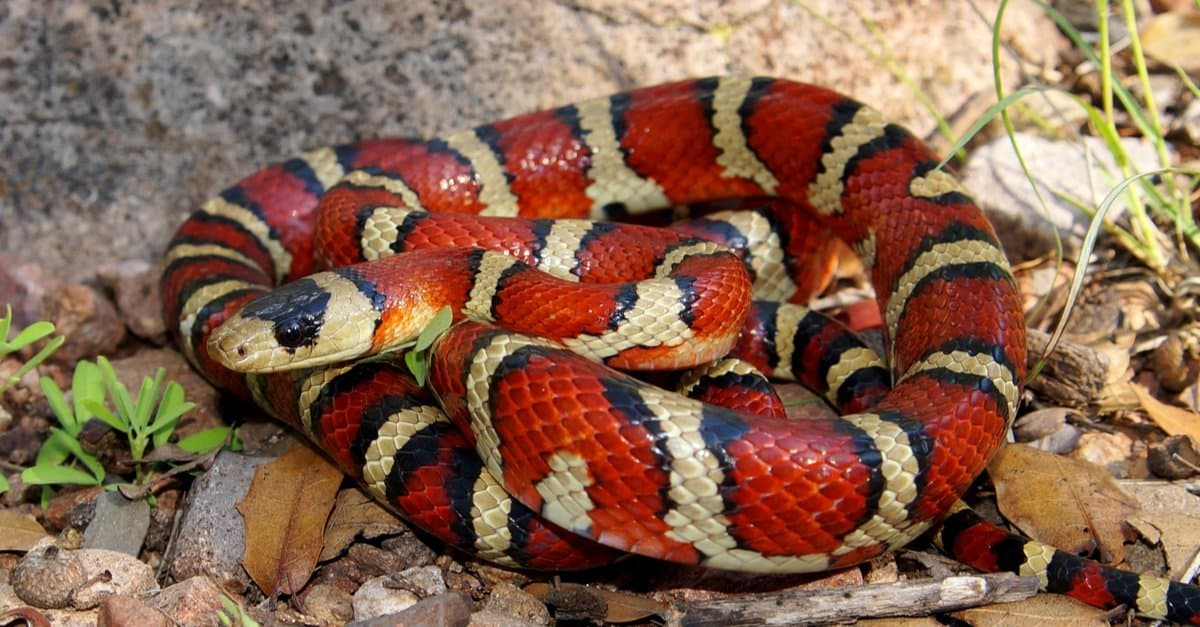

In [7]:
img

In [8]:
img_t = preprocess(img)

In [9]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [10]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
out = resnet(batch_t)
out

tensor([[-1.8955e+00,  9.3081e-01, -2.8735e+00, -2.6877e+00, -3.4558e+00,
         -1.0142e+00, -3.0046e+00,  1.0201e+00,  9.1782e-01, -2.6782e-01,
          4.2545e-01, -4.0801e-01, -1.6767e+00, -2.7358e+00, -2.0486e+00,
         -1.3938e+00,  5.0678e-02,  7.9468e-01,  1.0817e-01, -1.3777e+00,
         -2.9131e+00, -1.5249e+00, -3.4029e+00, -2.5849e+00, -2.6334e+00,
          1.6780e+00,  1.3043e+00,  1.7095e+00,  2.2112e+00, -1.6336e+00,
         -1.0452e+00, -1.6950e-01,  6.5227e-01, -1.5789e+00,  5.1795e-01,
          1.7074e+00,  2.2440e+00,  3.8845e-01,  4.4891e+00,  9.1123e-01,
         -4.9153e-02,  3.7331e+00,  2.6299e+00,  1.0217e+00,  4.3971e+00,
          3.5373e+00, -2.4508e-02,  7.8647e-01, -9.0391e-01, -5.9358e-01,
         -2.1317e-01, -8.9548e-01,  7.1063e+00,  8.7783e+00,  8.7408e+00,
          4.8640e+00,  1.5577e+01,  5.4894e+00,  4.5623e+00,  5.7572e+00,
          1.0585e+01,  8.1347e+00,  8.9747e+00,  6.2896e+00,  3.8190e+00,
          6.2029e+00,  8.7854e+00,  6.

In [12]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [13]:
_, index = torch.max(out, 1)

In [14]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('king snake, kingsnake', 98.525634765625)

In [15]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('king snake, kingsnake', 98.525634765625),
 ('night snake, Hypsiglena torquata', 0.6690857410430908),
 ('sidewinder, horned rattlesnake, Crotalus cerastes', 0.17810554802417755),
 ('rock python, rock snake, Python sebae', 0.13376137614250183),
 ('horned viper, cerastes, sand viper, horned asp, Cerastes cornutus',
  0.11069925129413605)]